In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
import yaml
import argparse
from utils import result_recoder, split_matrix
from train_test import  train_val, feat_imp 

In [4]:
def parse_args():
    parser = argparse.ArgumentParser()
    
    #data
    parser.add_argument('--train_val_data', default='test.csv',
                        help='train_val_data')
    parser.add_argument('--data_folder', default='test',
                        help='data_folder')
  
    # scheduler
    parser.add_argument('--lr', '--learning_rate', default=1e-2, type=float,
                        metavar='LR', help='initial learning rate')
    parser.add_argument('--scheduler', default='ReduceLROnPlateau',
                        choices=['CosineAnnealingLR', 'ReduceLROnPlateau', 'MultiStepLR', 'ConstantLR'])
    parser.add_argument('--min_lr', default=1e-6, type=float,
                        help='minimum learning rate')
    parser.add_argument('--factor', default=0.5, type=float)
    parser.add_argument('--patience', default=2, type=int)
    parser.add_argument('--milestones', default='1,2', type=str)
    parser.add_argument('--gamma', default=2/3, type=float)
    
    #hyper_parameter of data construction
    parser.add_argument('--adj_metric', default='cosine',
                        help='adj_metric')
    parser.add_argument('--adj_parameter', default=2, type=int,
                        help='adj_parameter')
    
    #parameter for training and validation 
    parser.add_argument('--fold_num', default=10, type=int,
                        help='number of fold for cross validation')
    parser.add_argument('--epochs', default=1500, type=int, metavar='N',
                        help='number of total epochs to run')
    
    #hyper_parameter of model
    parser.add_argument('--slope', default=[0.1])
    parser.add_argument('--dropout', default=[0.6])
    
    """
    For '--num_class', Two classifications were used in this study,
    progressive finger/wrist erosion group and non-progressive group.
    """
    parser.add_argument('--num_class', default=2, type=int,
                        help='Enter the number of classifications')  
    
    """
    For '--num_test_model', This code allows you to specify the number of models described in models.py to be evaluated within cross validation. 
    In this repository, only one model (GCN_E2_decline_leaky_slope) is described in models.py, 
    but you can add more to evaluate multiple models.
    """
    parser.add_argument('--num_test_model', default=1, type=int,
                        help='Enter the number of models you wish to evaluate in cross validation.') 
    
    args = parser.parse_args(args=['--data_folder', 'SHS_AI_wristE_s0.1_d0.6', 
                                   '--train_val_data', 'wrist_erosion_1503.csv', 
                                   '--scheduler', 'CosineAnnealingLR'])
    return args 
config = vars(parse_args())

In [5]:
#make data_matrix_file
split_matrix(config)

--------------------
train_val_data: wrist_erosion_1503.csv
fold_num: 10
epochs: 1500
data_folder: SHS_AI_wristE_s0.1_d0.6
num_class: 2
num_test_model: 1
adj_metric: cosine
adj_parameter: 2
lr: 0.01
scheduler: CosineAnnealingLR
min_lr: 1e-06
factor: 0.5
patience: 2
milestones: 1,2
gamma: 0.6666666666666666
slope: [0.1]
dropout: [0.6]
--------------------
======1th fold======
number of features 87
slope 0.1
gcn_dropout 0.6
model_name GCN_E2_decline_leaky_slope
Test AUC: 0.796
Test F1: 0.400
Test ACC: 0.821


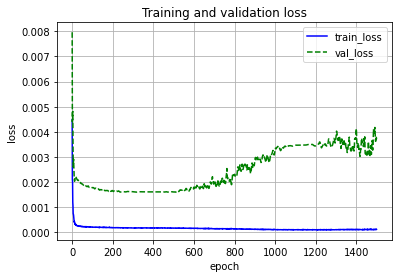

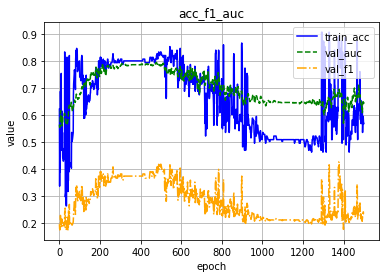

======2th fold======
number of features 87
slope 0.1
gcn_dropout 0.6
model_name GCN_E2_decline_leaky_slope
Test AUC: 0.674
Test F1: 0.327
Test ACC: 0.781


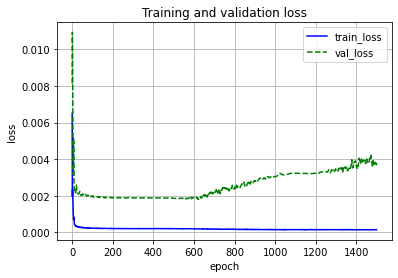

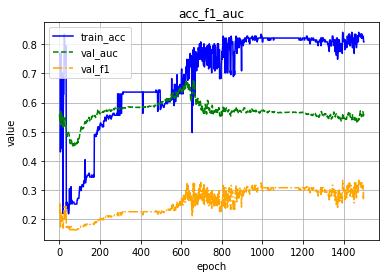

======3th fold======
number of features 87
slope 0.1
gcn_dropout 0.6
model_name GCN_E2_decline_leaky_slope
Test AUC: 0.722
Test F1: 0.329
Test ACC: 0.675


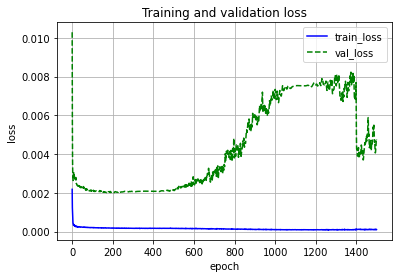

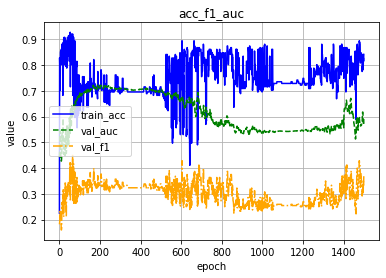

======4th fold======
number of features 87
slope 0.1
gcn_dropout 0.6
model_name GCN_E2_decline_leaky_slope
Test AUC: 0.802
Test F1: 0.367
Test ACC: 0.747


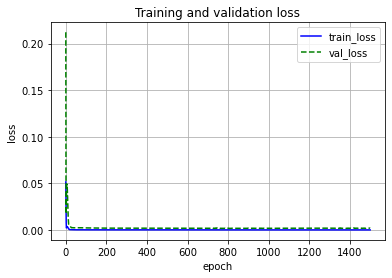

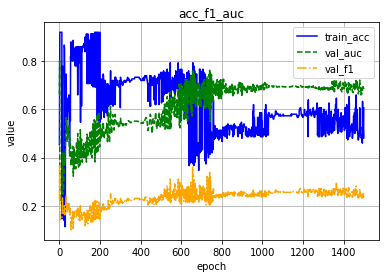

======5th fold======
number of features 87
slope 0.1
gcn_dropout 0.6
model_name GCN_E2_decline_leaky_slope
Test AUC: 0.739
Test F1: 0.239
Test ACC: 0.660


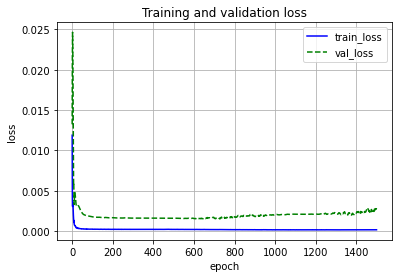

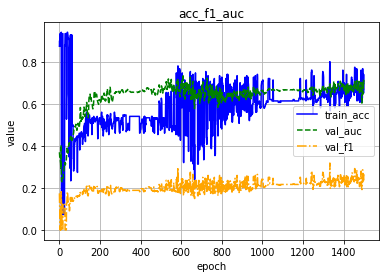

======6th fold======
number of features 87
slope 0.1
gcn_dropout 0.6
model_name GCN_E2_decline_leaky_slope
Test AUC: 0.836
Test F1: 0.375
Test ACC: 0.733


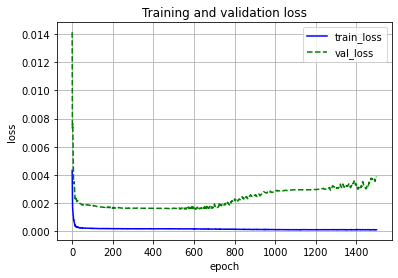

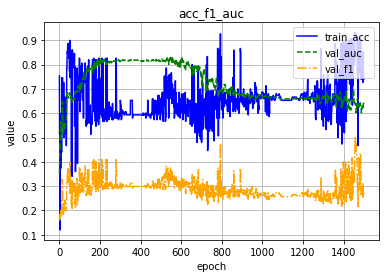

======7th fold======
number of features 87
slope 0.1
gcn_dropout 0.6
model_name GCN_E2_decline_leaky_slope
Test AUC: 0.775
Test F1: 0.333
Test ACC: 0.627


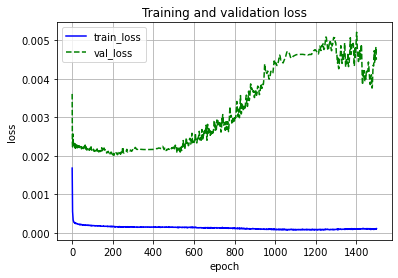

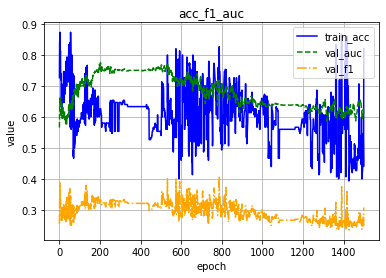

======8th fold======
number of features 87
slope 0.1
gcn_dropout 0.6
model_name GCN_E2_decline_leaky_slope
Test AUC: 0.826
Test F1: 0.394
Test ACC: 0.713


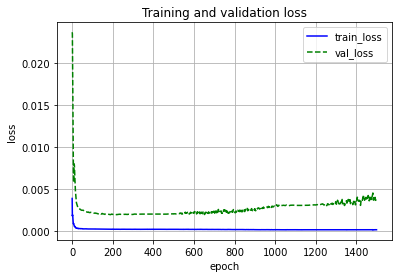

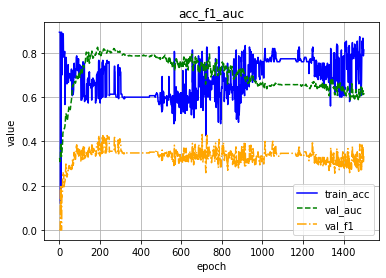

======9th fold======
number of features 87
slope 0.1
gcn_dropout 0.6
model_name GCN_E2_decline_leaky_slope
Test AUC: 0.574
Test F1: 0.353
Test ACC: 0.927


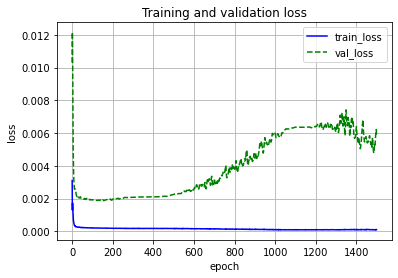

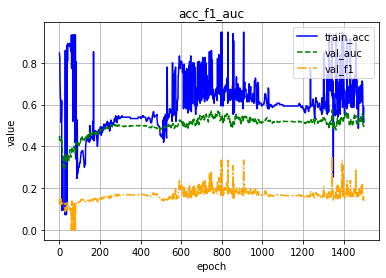

======10th fold======
number of features 87
slope 0.1
gcn_dropout 0.6
model_name GCN_E2_decline_leaky_slope
Test AUC: 0.738
Test F1: 0.286
Test ACC: 0.733


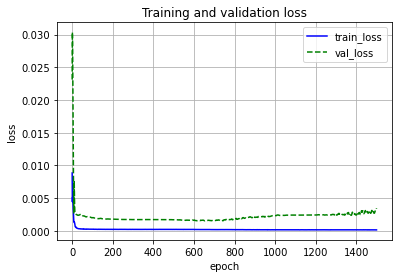

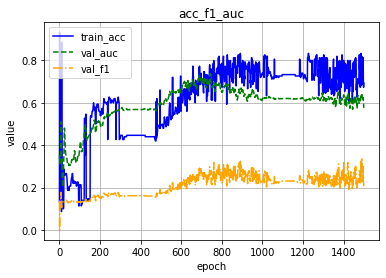

=========Display of the best model results=========
gcn_name    GCN_E2_decline_leaky_slope
slope                              0.1
dropout                            0.6
auc                           0.795564
auc                            0.67446
auc                           0.722059
auc                           0.801797
auc                           0.739286
auc                           0.836047
auc                           0.775187
auc                            0.82556
auc                           0.574286
auc                           0.737857
Name: 0, dtype: object
Mean AUC of cross-validation 0.7482101552346949
best model index 0
1th_auc 0.7955635491606714
2th_auc 0.6744604316546763
3th_auc 0.7220588235294118
4th_auc 0.8017967434025829
5th_auc 0.7392857142857143
6th_auc 0.8360471645143179
7th_auc 0.7751865671641791
8th_auc 0.8255597014925373
9th_auc 0.5742857142857143
10th_auc 0.7378571428571429


C:\Users\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


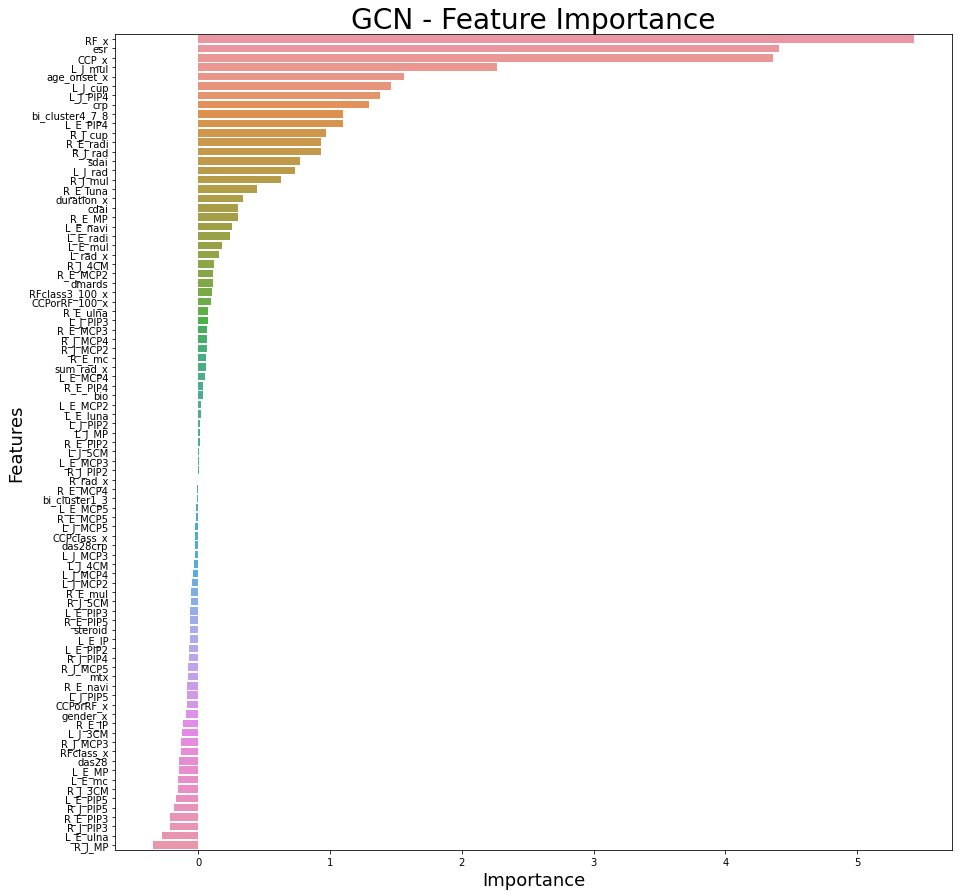

In [6]:
def main():
    print('-' * 20)
    for key in config:
        print('%s: %s' % (key, config[key]))
    print('-' * 20)
    
    with open(config["data_folder"] + '/config.yml', 'w') as f:
        yaml.dump(config, f)
    
    dataframe, gcn_list, dim_list = train_val(config)
    best_model_index, best_gcn_name = result_recoder(dataframe, config)
    feat_imp(config, best_model_index, gcn_list, best_gcn_name, dim_list)
    
if __name__ == '__main__':
     main()